<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231101/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88%E3%81%A8%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%AE%E5%AE%9F%E8%B7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第6回（2023/11/1）

#本日の講義の目的





前回までの講義内容を復習し、基礎集計と可視化を実施してみる

## 準備

In [ ]:
!pip install japanize-matplotlib

In [ ]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns



---



---



# Booksデータベース

## データの読み込み
* データをダウンロード

    以下のアドレスより、book.csv をPCにダウンロードする。

    https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231101

* Google Drive のマウントの確認

* データ（ books.csv ）を Google Drive の適当なフォルダーにアップロード

In [ ]:
# データフレームへの読み込み
file_name = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/books.csv'
# 一部に読み込めないレコードがあるので、error_bad_lines=False を指定している
df = pd.read_csv(file_name, error_bad_lines=False)
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

## データの確認

In [ ]:
df.shape

(11123, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


データの説明

特徴量                  | 説明
--                      | --
 bookID             |  本のID番号
 title              |  本のタイトル
 authors            |  本の著者
 average_rating     |  平均評価
 isbn               |  ISBN番号
 isbn13             |  ISBN番号
 language_code      |  言語
 num_pages          |  ページ数
 ratings_count      |  評価の数
 text_reviews_count |  レビュー文章が記載された数
 publication_date   |  出版日  
 publisher          |  出版社

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
# Group the data by authors, count the number of books for each author, sort in descending order, and get the top 10
books_per_author = df.groupby('authors')['bookID'].count().sort_values(ascending=False).head(10)
books_per_author


authors
Stephen King           40
P.G. Wodehouse         40
Rumiko Takahashi       39
Orson Scott Card       35
Agatha Christie        33
Piers Anthony          30
Mercedes Lackey        29
Sandra Brown           29
Dick Francis           28
Laurell K. Hamilton    23
Name: bookID, dtype: int64

In [ ]:
# Group the data by authors and compute the average rating for each author
df.groupby('authors')['average_rating'].mean().sort_values(ascending=False)
# average_rating_per_author = df.groupby('authors')['average_rating'].mean()
# average_rating_per_author

authors
Keith Donohue                      5.0
John  Diamond                      5.0
R. McL. Wilson                     5.0
Nicholas    Evans/Rhonda  Evans    5.0
James E. Campbell                  5.0
                                  ... 
Warren G. Bennis                   0.0
James Craig Holte                  0.0
Dan Hitt/James Beckett III         0.0
Andrew      Hunt                   0.0
Graham Handley                     0.0
Name: average_rating, Length: 6639, dtype: float64

In [ ]:
# Group the data by authors and compute the average rating for each author
average_rating_per_author = df.groupby('authors')['average_rating'].mean().reset_index()
average_rating_per_author

,authors,average_rating
0,A.B. Yehoshua/Hillel Halkin,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,4.150
3,A.J. Jacobs,3.760
4,A.M. Homes,3.280
...,...,...
6634,Émile Zola/Henri Mitterand,4.060
6635,Émile Zola/Robert Lethbridge/Elinor Dorday,4.010
6636,Émile Zola/Robin Buss/Brian Nelson,3.990
6637,Émile Zola/Roger Pearson,4.045


In [ ]:
df.groupby('authors')['num_pages'].mean().sort_values(ascending=False)

authors
Winston S. Churchill/John Keegan                                                     4736.0
Marcel Proust/C.K. Scott Moncrieff/Frederick A. Blossom/Joseph Wood Crutch           3400.0
Dennis L. Kasper/Dan L. Longo/Stephen L. Hauser/Anthony S. Fauci/Eugene Braunwald    2751.0
Anonymous                                                                            2198.0
Laurence L. Brunton/John S. Lazo/Keith  L. Parker                                    2021.0
                                                                                      ...  
Robert B. Parker/Joe Mantegna                                                           0.0
Mary Higgins Clark/Jan Maxwell                                                          0.0
Robert   Harris/Michael Cumpsty                                                         0.0
Dan Brown/Paul Michael                                                                  0.0
J.R.R. Tolkien/Martin Shaw                                              

In [ ]:
# Group the data by authors and compute the average rating for each author
average_rating_per_author = df.groupby('authors')['average_rating'].mean().reset_index()
average_rating_per_author

,authors,average_rating
0,A.B. Yehoshua/Hillel Halkin,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,4.150
3,A.J. Jacobs,3.760
4,A.M. Homes,3.280
...,...,...
6634,Émile Zola/Henri Mitterand,4.060
6635,Émile Zola/Robert Lethbridge/Elinor Dorday,4.010
6636,Émile Zola/Robin Buss/Brian Nelson,3.990
6637,Émile Zola/Roger Pearson,4.045


In [ ]:
language_counts = df.groupby('language_code').size().sort_values(ascending=False).reset_index()
language_counts.columns = ['language_code', 'count']
language_counts.head()

,language_code,count
0,eng,8908
1,en-US,1408
2,spa,218
3,en-GB,214
4,fre,144


In [ ]:
# Group the data by publisher and compute the average number of pages for each publisher
average_pages_per_publisher = df.groupby('publisher')['num_pages'].mean().reset_index()
average_pages_per_publisher

,publisher,num_pages
0,10/18,364.000000
1,1st Book Library,600.000000
2,1st World Library,387.000000
3,A & C Black (Childrens books),62.000000
4,A Harvest Book/Harcourt Inc.,216.000000
...,...,...
2285,聯經出版事業股份有限公司,537.500000
2286,英文漢聲出版股份有限公司,36.000000
2287,角川書店 (Kadokawa Shoten),171.500000
2288,講談社,186.833333


In [ ]:
df[ df['publisher']=='集英社' ]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
872,2885,DEATH NOTE デスノート 1,Tsugumi Ohba/Takeshi Obata/大場 つぐみ/小畑 健,4.43,4088736214,9784088736211,jpn,195,227,38,4/2/2004,集英社
3775,13593,ヒカルの碁 18、番外編,Yumi Hotta/Yumi Hotta,4.11,4088732898,9784088732893,jpn,211,275,7,8/2/2002,集英社
3776,13594,ヒカルの碁 23、あなたに呼びかけている,Yumi Hotta/Yumi Hotta,4.22,4088735048,9784088735047,jpn,198,61,5,9/4/2003,集英社
3777,13595,ヒカルの碁 7、若獅子戦,Yumi Hotta/Yumi Hotta,4.26,4088728734,9784088728735,jpn,208,9,2,6/7/2000,集英社
3778,13596,ヒカルの碁 15、さよなら,Yumi Hotta/Yumi Hotta,4.25,4088732154,9784088732152,jpn,211,289,8,12/24/2001,集英社
3779,13598,ヒカルの碁 13、プロ第一戦,Yumi Hotta/Yumi Hotta,4.26,4088731441,9784088731445,jpn,195,11,2,8/8/2001,集英社
3780,13600,ヒカルの碁 14、sai vs toya koyo,Yumi Hotta/Yumi Hotta,4.23,4088731697,9784088731698,jpn,189,331,6,10/9/2001,集英社
3781,13602,ヒカルの碁 16、中国棋院,Yumi Hotta/Yumi Hotta,4.15,4088732324,9784088732329,jpn,191,282,7,3/4/2002,集英社
3782,13603,ヒカルの碁 6、院生試験,Yumi Hotta/Takeshi Obata,4.22,4088728491,9784088728490,jpn,211,8,2,4/9/2000,集英社
3783,13608,ヒカルの碁 9、本戦開始,Yumi Hotta/Yumi Hotta,4.27,4088730224,9784088730226,jpn,207,9,2,10/9/2000,集英社


In [ ]:
# Group the data by publisher and sum the ratings_count for each publisher
ratings_count_per_publisher = df.groupby('publisher')['ratings_count'].sum().sort_values(ascending=False).reset_index()
ratings_count_per_publisher

,publisher,ratings_count
0,Penguin Books,10967448
1,Scholastic Inc.,6617877
2,Little Brown and Company,5493803
3,Penguin Classics,5281321
4,Vintage,5001557
...,...,...
2285,Gale Cengage,0
2286,Live Oak Media,0
2287,Puzzle-Roca,0
2288,Rosenberg Publishing,0


In [ ]:
# Group the data by publisher and sum the text_reviews_count for each publisher
text_reviews_count_per_publisher = df.groupby('publisher')['text_reviews_count'].sum().sort_values(ascending=False).reset_index()
text_reviews_count_per_publisher

,publisher,text_reviews_count
0,Penguin Books,296756
1,Vintage,242670
2,Alfred A. Knopf,139108
3,Little Brown and Company,125560
4,Penguin Classics,107382
...,...,...
2285,University of Pittsburgh Press,0
2286,Mel Bay Publications Inc.,0
2287,Northwestern Univ Press,0
2288,University of Toronto Press,0


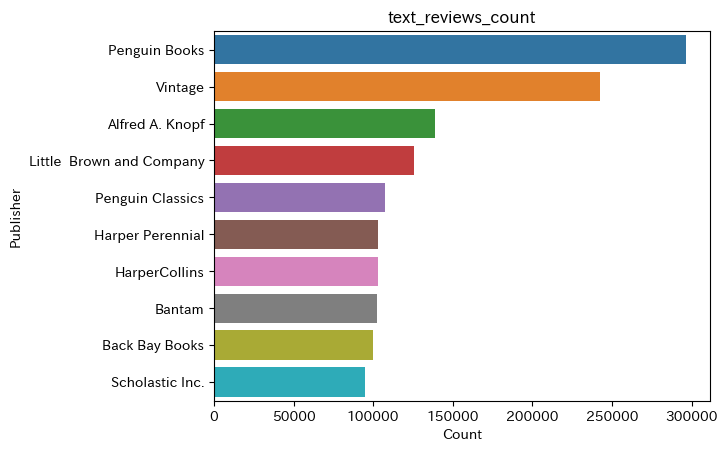

In [ ]:
sns.barplot(x='text_reviews_count', y='publisher', data=text_reviews_count_per_publisher.head(10))
plt.title('text_reviews_count')
plt.xlabel('Count')
plt.ylabel('Publisher')

plt.show()


---
---

# Titanic データの説明

1912年に起きたTitanic号の沈没事故に関するデータを使い、今までの講義内容を復習する。

今回利用するデータは seaborn パッケージに含まれているサンプルデータである。

In [ ]:
# データの読み込み
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB



今回利用するデータの概要は以下の通り。

項目 | 説明
-- | --
survived | 生存したかどうか（0 = No, 1 = Yes）
pclass   | 乗客のクラス（1 = 1st, 2 = 2nd, 3 = 3rd）
sex      | 性別（male, female）
age      | 年齢
sibsp  | タイタニック号に乗っていた兄弟姉妹/配偶者の数
parch | タイタニック号に乗っていた親/子供の数
fare | 乗船料金
embarked |  乗船した港（C = Cherbourg, Q = Queenstown, S = Southampton）
class | 乗客のクラスを文字列で（'First', 'Second', 'Third'）
who | 乗客のタイプ（'man', 'woman', 'child'）
adult_male |  成人男性かどうか（True, False）
deck |  乗客がいたデッキ（A, B, C, D, E, F, G, NaN）
embark_town |  乗船した町の名前（'Southampton', 'Cherbourg', 'Queenstown', NaN）
alive |  生存したかどうかを文字列で入力（'yes', 'no'）
alone | 一人で乗船したかどうか（True, False）

なお、欠損値: age、embarked などの特定の列に欠損値が存在する。


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.describe()

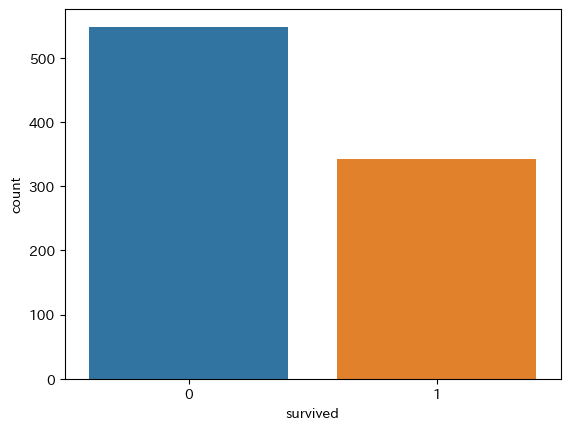

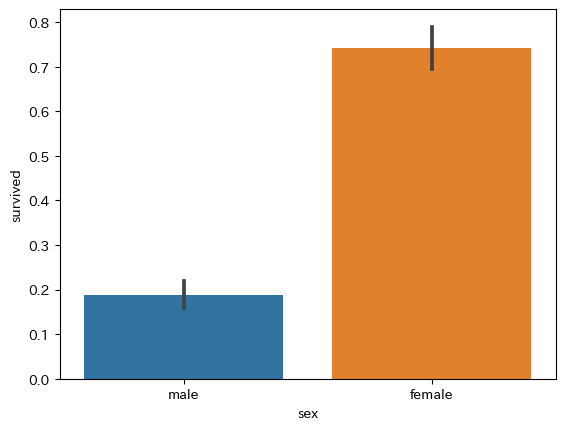

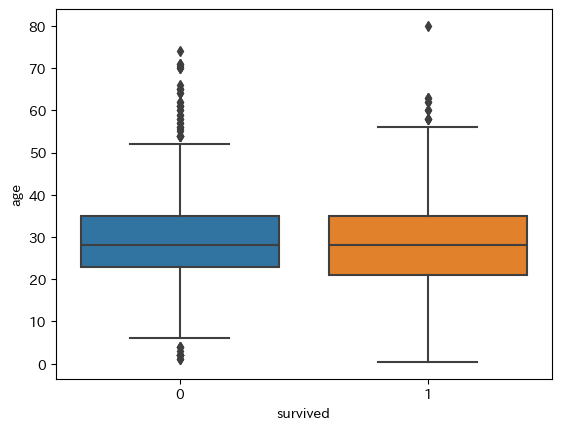

In [ ]:
# データの前処理
df['age'].fillna(df['age'].median(), inplace=True)  # 'age'列の欠損値を中央値で埋める
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # 'embarked'列の欠損値を最頻値で埋める

# 基礎集計
survival_count = df['survived'].value_counts()  # 生存者と死亡者の数を集計
survival_rate_by_gender = df.groupby('sex')['survived'].mean()  # 性別ごとの生存率を集計

# データの可視化（Seaborn使用）
sns.countplot(x='survived', data=df)  # 生存者と死亡者の数を棒グラフで表示
plt.show()

sns.barplot(x='sex', y='survived', data=df)  # 性別ごとの生存率を棒グラフで表示
plt.show()

sns.boxplot(x='survived', y='age', data=df)  # 年齢と生存率の関係を箱ひげ図で表示
plt.show()


<Axes: xlabel='survived', ylabel='count'>

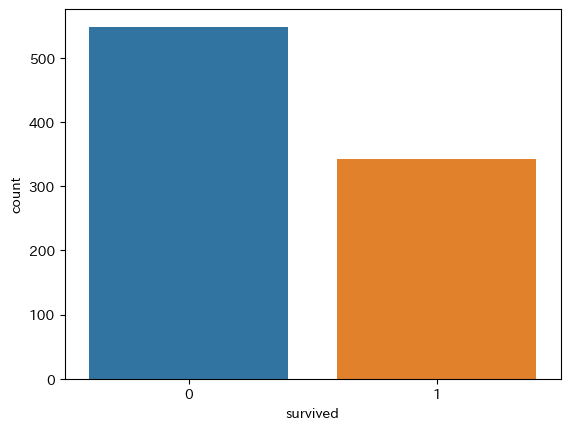

In [ ]:
sns.countplot(x='survived', data=df)  # 生存者と死亡者の数を棒グラフで表示

<Axes: xlabel='survived'>

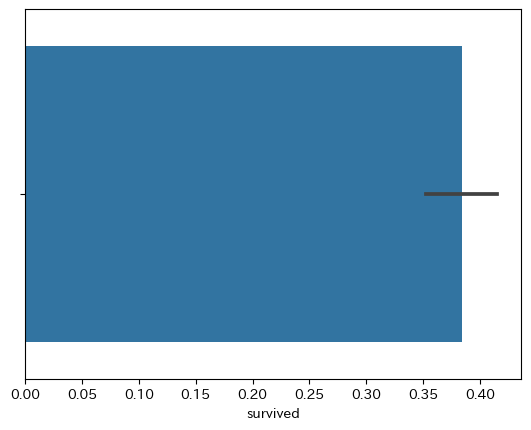

In [ ]:
sns.barplot(x='survived', data=df)